In [17]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of Deliverable_3_3.LinearMPC_template.MPCControl_xvel failed: Traceback (most recent call last):
  File "c:\Users\makss\Git\MPC-Project-EPFL\mpc2025\Lib\site-packages\IPython\extensions\autoreload.py", line 322, in check
    elif self.deduper_reloader.maybe_reload_module(m):
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\makss\Git\MPC-Project-EPFL\mpc2025\Lib\site-packages\IPython\extensions\deduperreload\deduperreload.py", line 545, in maybe_reload_module
    new_source_code = f.read()
                      ^^^^^^^^
  File "C:\Users\makss\AppData\Local\Programs\Python\Python312\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 991: character maps to <undefined>
]
[autoreload of Deliverable_3_3.LinearMPC_template.MPCControl_yvel failed: Traceback (mos

In [18]:
# MPC import
from Deliverable_3_3.LinearMPC_template.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [19]:
Ts = 0.05
sim_time = 20
H = 5.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=399, step=2), IntSlider(value=0…

In [20]:
##################################

        # SIMU INFO

##################################
print("=== Simulation info ===")
print(f"Ts           = {Ts} s")
print(f"Horizon H    = {H} s ({int(H/Ts)} steps)")
print(f"Sim time     = {sim_time} s")
print(f"Method       = linear")
print("")



##################################

    # Input constraints INFO

##################################

print("=== Input constraints check ===")

print(f"d1   in [{np.rad2deg(u_cl[0,:].min()):.3f}, {np.rad2deg(u_cl[0,:].max()):.3f}]   (limit ±15°)")
print(f"d2   in [{np.rad2deg(u_cl[1,:].min()):.3f}, {np.rad2deg(u_cl[1,:].max()):.3f}]   (limit ±15°)")
print(f"Pavg in [{u_cl[2,:].min():.2f}, {u_cl[2,:].max():.2f}]   (limit [40,80])")
print(f"Pdif in [{u_cl[3,:].min():.2f}, {u_cl[3,:].max():.2f}]   (limit ±20)")
print("")


import numpy as np

alpha = np.rad2deg(x_cl[3, :])
beta  = np.rad2deg(x_cl[4, :])


##################################

    # Angle constraints INFO

##################################

print("=== Angle constraints check ===")
print(f"alpha max |α| = {np.abs(alpha).max():.2f} deg   (limit 10 deg)")
print(f"beta  max |β| = {np.abs(beta).max():.2f} deg   (limit 10 deg)")
print("")




=== Simulation info ===
Ts           = 0.05 s
Horizon H    = 5.0 s (100 steps)
Sim time     = 20 s
Method       = linear

=== Input constraints check ===
d1   in [-14.900, 14.877]   (limit ±15°)
d2   in [-14.877, 14.900]   (limit ±15°)
Pavg in [40.10, 75.91]   (limit [40,80])
Pdif in [0.00, 0.00]   (limit ±20)

=== Angle constraints check ===
alpha max |α| = 9.91 deg   (limit 10 deg)
beta  max |β| = 9.91 deg   (limit 10 deg)



In [21]:
def settling_time(t, signal, tol=0.15):
    ref = 0.0
    err = np.abs(signal - ref)
    idx = np.where(err <= tol)[0]
    if len(idx) == 0:
        return None
    for k in idx:
        if np.all(err[k:] <= tol):
            return t[k]
    return None

def print_settling(name, t, sig, tol):
    ts = settling_time(t, sig, tol)
    if ts is None:
        print(f"{name} settling time: > {t[-1]:.2f} s (not settled)")
    else:
        print(f"{name} settling time: {ts:.2f} s")

##################################

    # Settling time INFO

##################################
print("=== Settling time ===")
print_settling("vx", t_cl, x_cl[6,:], tol=0.25)
print_settling("vy", t_cl, x_cl[7,:], tol=0.25)
print_settling("vz", t_cl, x_cl[8,:], tol=0.25)
print("")

Xf_x = mpc.mpc_x.Xf  # terminal set xvel
inside = [
    Xf_x.contains(x_cl[mpc.mpc_x.x_ids, k] - mpc.mpc_x.xs)
    for k in range(x_cl.shape[1])
]

first_inside = next((t_cl[k] for k,v in enumerate(inside) if v), None)

##################################

    # Terminal set entry INFO

##################################

print("=== Terminal set entry ===")
print(f"xvel enters Xf at t = {first_inside:.2f} s")
print("")


##################################

      # Trim values INFO

##################################

print("=== TRIM VALUES ===")

print("\n--- xvel ---")
print("xs_xvel =", mpc.mpc_x.xs)
print("us_xvel =", mpc.mpc_x.us)

print("\n--- yvel ---")
print("xs_yvel =", mpc.mpc_y.xs)
print("us_yvel =", mpc.mpc_y.us)

print("\n--- zvel ---")
print("xs_zvel =", mpc.mpc_z.xs)
print("us_zvel =", mpc.mpc_z.us)

print("\n--- roll ---")
print("xs_roll =", mpc.mpc_roll.xs)
print("us_roll =", mpc.mpc_roll.us)


=== Settling time ===
vx settling time: 19.90 s
vy settling time: 19.90 s
vz settling time: > 20.00 s (not settled)

=== Terminal set entry ===
xvel enters Xf at t = 0.00 s

=== TRIM VALUES ===

--- xvel ---
xs_xvel = [0. 0. 0.]
us_xvel = [0.]

--- yvel ---
xs_yvel = [0. 0. 0.]
us_yvel = [0.]

--- zvel ---
xs_zvel = [0.]
us_zvel = [66.66666667]

--- roll ---
xs_roll = [0. 0.]
us_roll = [0.]


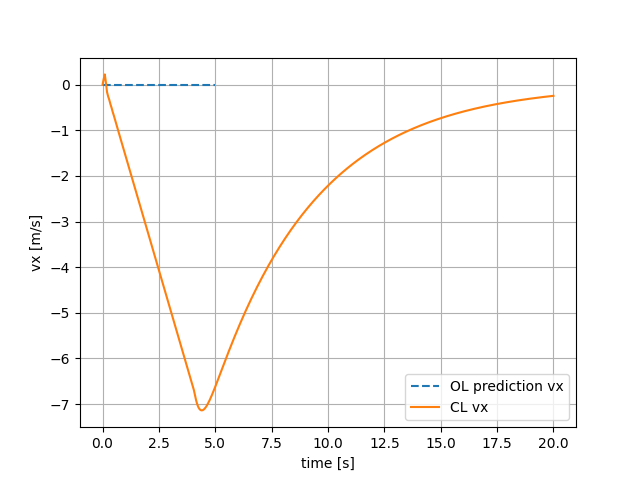

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t_ol[:,0], x_ol[2,:,0], '--', label="OL prediction vx")
plt.plot(t_cl, x_cl[6,:], label="CL vx")
plt.xlabel("time [s]")
plt.ylabel("vx [m/s]")
plt.legend()
plt.grid(True)


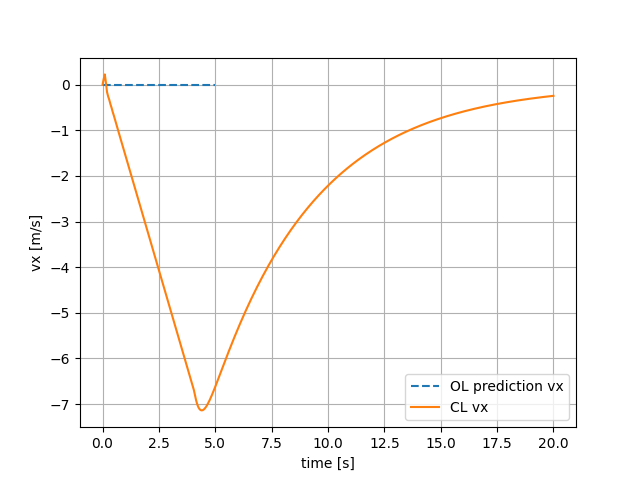

In [23]:
plt.figure()

# OL prediction at time k=0 (reconstructed)
vx_ol = mpc.mpc_x.xs[2] + x_ol[2,:,0]
plt.plot(t_ol[:,0], vx_ol, '--', label="OL prediction vx")

# CL trajectory
plt.plot(t_cl, x_cl[6,:], label="CL vx")

plt.xlabel("time [s]")
plt.ylabel("vx [m/s]")
plt.legend()
plt.grid(True)


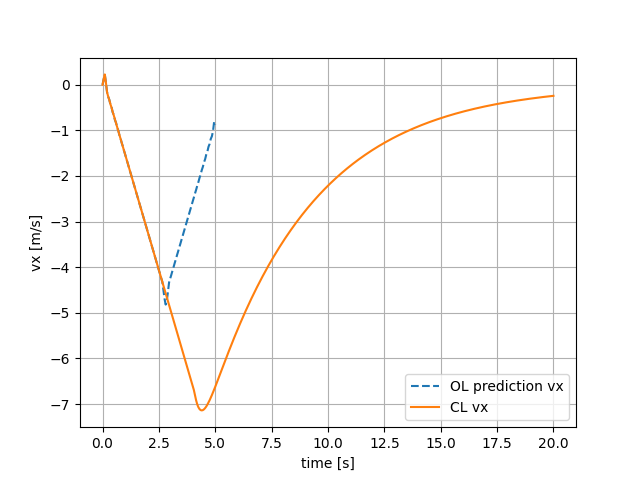

In [24]:
plt.figure()

# Open-loop prediction of vx at time k=0 (FULL state index!)
plt.plot(
    t_ol[:, 0],
    x_ol[6, :, 0],     # <-- index 6 = vx
    '--',
    label="OL prediction vx"
)

# Closed-loop vx
plt.plot(
    t_cl,
    x_cl[6, :],
    label="CL vx"
)

plt.xlabel("time [s]")
plt.ylabel("vx [m/s]")
plt.legend()
plt.grid(True)
